# Mean-Variance Analysis and the Sharpe Ratio

## Getting started

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

__GBP_USD__: Long Position in GBP (denominated in USD) <br>
__USD_GBP__: Short Position in GBP (== Long Position in USD; denominated in GBP) <br>
__Levered__: USD_GBP with Leverage ("Trading USD_GBP on Margin") <br>
__Neutral__: Neutral Positions only (no Investments / Trades)  <br>
__Low_Vol__: Active Strategy for USD_GBP with Long, Short and Neutral Positions <br>
__Random__: Random "Strategy" for USD_GBP with random Long, Short and Neutral Positions

In [ ]:
returns.info()

In [ ]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [ ]:
returns.Low_Vol.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [ ]:
returns.Low_Vol.value_counts()

In [ ]:
returns[["Low_Vol", "Levered"]].cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

__Which one would you (intuitively) prefer?__

__Low_Vol__, right? Let´s create a __risk-adjusted return metric__ that reflects/confirms this intuition!

## Mean Return (Reward)

In [ ]:
returns

__mean return__

In [ ]:
returns.mean()

__annualized mean return__

In [66]:
td_year = returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)
td_year

AAPL    251.818323
AMGN    251.818323
AXP     251.818323
BA      251.818323
CAT     251.818323
CRM     251.818323
CSCO    251.818323
CVX     251.818323
DIS     251.818323
DOW     251.818323
GS      251.818323
HD      251.818323
HON     251.818323
IBM     251.818323
INTC    251.818323
JNJ     251.818323
JPM     251.818323
KO      251.818323
MCD     251.818323
MMM     251.818323
MRK     251.818323
MSFT    251.818323
NKE     251.818323
PG      251.818323
TRV     251.818323
UNH     251.818323
V       251.818323
VZ      251.818323
WBA     251.818323
WMT     251.818323
dtype: float64

In [ ]:
ann_mean = returns.mean() * td_year
ann_mean

In [ ]:
np.exp(ann_mean) - 1 # CAGR

In [ ]:
summary = pd.DataFrame(data = {"ann_mean":ann_mean})
summary

In [ ]:
summary.rank(ascending = False)

## Standard Deviation (Risk)

In [ ]:
returns

__Standard Deviation of Returns__

In [ ]:
returns.std()

__Annualized Standard Deviation__

In [ ]:
td_year

In [ ]:
ann_std = returns.std() * np.sqrt(td_year)
ann_std

In [ ]:
summary["ann_std"] = returns.std() * np.sqrt(td_year)

In [ ]:
summary.sort_values(by = "ann_std")

## Risk-adjusted Return ("Sharpe Ratio")

In [ ]:
summary

__Graphical Solution__

In [ ]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.xlim(-0.01, 0.23)
plt.ylim(-0.02, 0.03)
plt.xlabel("Risk(std)", fontsize = 15)
plt.ylabel("Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__Risk-adjusted Return Metric__ ("Sharpe Ratio light")

In [ ]:
rf = 0 # simplification, don´t use this assumption for Portfolio Management!

In [ ]:
summary["Sharpe"] = (summary.ann_mean - rf) / summary.ann_std

In [ ]:
summary.sort_values(by = "Sharpe", ascending = False)

In [ ]:
td_year

In [ ]:
returns.mean() / returns.std() * np.sqrt(td_year) # alternative: annualizing daily sharpe

## Putting everything together

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

In [ ]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [ ]:
returns.apply(sharpe, rf = 0)

In [ ]:
sharpe(series = returns.Levered, rf = 0)

------------------------------

## Coding Challenge

__Calculate and compare__ the __Sharpe Ratio__ (assumption: rf == 0) for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021. 

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.
 

Determine the __best performing stock__ and the __worst performing stock__ according to the Sharpe Ratio.

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Sharpe Ratio is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

In [740]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def norm(sr=None):
    if sr is None:
        return np.nan
    else:
        sr.fillna(method='bfill', axis=0, inplace=True)
        return (sr.div(sr.iloc[0]))
    
def sharpe_table(norm_returns = None, rf = 0):
    result = pd.DataFrame()
    result['mean'] = norm_returns.mean() * norm_returns.count() / ((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25)
    result['std'] = norm_returns.std() * np.sqrt(norm_returns.count() / ((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25))
    result['shp'] = result['mean'].div(result['std'])
    return result

def plot_sharpe(df, l = 10):
    limiter = l
    #line = pd.DataFrame(data=[[0,0],[0.5,0.5]], columns=['x','y'])
    plots = df.iloc[:limiter] 
    line = pd.DataFrame(data=[[0,0],[plots['std'].max(),plots['mean'].max()]], columns=['x','y'])

    plt.figure(figsize = (12,8))

    plots.plot(kind = "scatter", x='std', y='mean', figsize = (15,12), s = 50, fontsize = 15)
    for i in plots.index:
        plt.annotate(i, xy=(plots.loc[i, "std"]+0.0005, plots.loc[i, "mean"]+0.0005), size = 15)
    plt.xlabel("Risk (std)", fontsize = 15)
    plt.ylabel("Mean Return", fontsize = 15)
    plt.title("Top {} Stocks: Mean-Variance Analysis".format(limiter), fontsize = 20)
    plt.plot(line.x, line.y, label = 'Trend Line')
    plt.show()

In [734]:
raw = pd.read_csv('Dow_Jones.csv', parse_dates=True,index_col=['Date']).dropna()

In [735]:
norm_raw = raw.apply(norm)
norm_returns = np.log(norm_raw/norm_raw.shift())

summary = sharpe_table(norm_returns).sort_values(by='shp', ascending=False)
summary.mean()

mean    0.114898
std     0.350949
shp     0.345575
dtype: float64

In [736]:
#plot_sharpe(summary, 10)
line

,x,y
0,0.000000,0.000000
1,0.455535,0.636257


In [737]:
line.y/line.x

0         NaN
1    1.396725
dtype: float64

<Figure size 864x576 with 0 Axes>

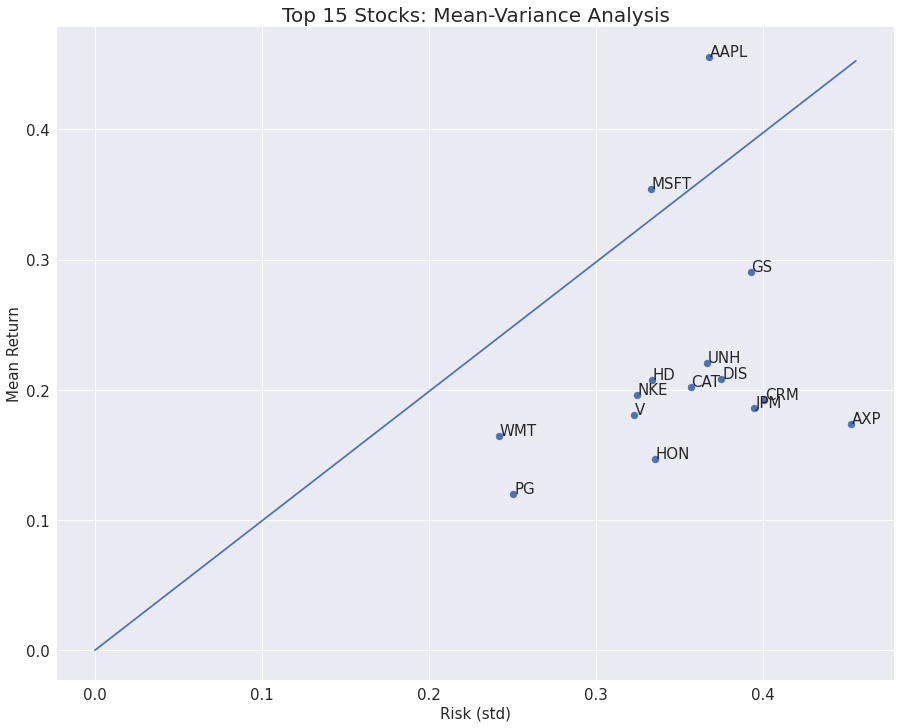

In [739]:
plot_sharpe(summary,15)

## +++ Please stop here in case you don´t want to see the solution!!! +++++

## Coding Challenge Solution

In [59]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,47.810001,191.770004,111.699997,391.540009,140.250000,161.179993,54.980000,124.940002,112.510002,53.500000,...,79.484734,119.019997,85.230003,103.639999,138.020004,245.539993,157.259995,59.090000,63.490002,97.820000
2019-04-02,48.505001,192.429993,111.000000,390.750000,140.190002,160.509995,55.290001,124.930000,111.959999,56.250000,...,79.398857,119.190002,84.370003,103.750000,136.809998,244.410004,157.779999,58.529999,55.360001,96.940002
2019-04-03,48.837502,192.919998,110.559998,384.739990,139.259995,162.619995,55.630001,123.889999,112.519997,56.880001,...,79.370232,119.970001,84.470001,103.690002,136.600006,245.839996,158.460007,58.869999,54.840000,97.190002
2019-04-04,48.922501,192.330002,110.120003,395.859985,140.130005,158.520004,55.139999,124.800003,114.750000,59.709999,...,78.101143,119.360001,85.279999,103.430000,136.520004,247.389999,157.639999,58.990002,54.150002,98.110001
2019-04-05,49.250000,195.410004,110.959999,391.929993,140.360001,158.559998,55.209999,126.419998,115.000000,57.240002,...,77.433205,119.889999,85.400002,103.650002,136.399994,248.779999,157.649994,59.090000,54.689999,98.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,126.739998,236.820007,166.509995,252.759995,240.160004,236.419998,54.130001,108.730003,176.330002,69.379997,...,72.400002,252.570007,133.350006,134.839996,157.539993,401.739990,232.050003,57.150002,54.000000,139.830002
2021-06-09,127.129997,239.520004,164.089996,248.059998,234.649994,236.089996,54.020000,107.779999,176.039993,68.839996,...,74.040001,253.589996,131.839996,134.789993,154.740005,401.100006,232.309998,57.049999,53.430000,139.080002
2021-06-10,126.110001,244.639999,162.229996,248.339996,225.729996,240.190002,55.029999,108.410004,176.570007,67.989998,...,76.139999,257.239990,130.979996,135.789993,154.020004,401.489990,233.949997,57.340000,55.310001,139.880005


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 556 entries, 2019-04-01 to 2021-06-14
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    556 non-null    float64
 1   AMGN    556 non-null    float64
 2   AXP     556 non-null    float64
 3   BA      556 non-null    float64
 4   CAT     556 non-null    float64
 5   CRM     556 non-null    float64
 6   CSCO    556 non-null    float64
 7   CVX     556 non-null    float64
 8   DIS     556 non-null    float64
 9   DOW     556 non-null    float64
 10  GS      556 non-null    float64
 11  HD      556 non-null    float64
 12  HON     556 non-null    float64
 13  IBM     556 non-null    float64
 14  INTC    556 non-null    float64
 15  JNJ     556 non-null    float64
 16  JPM     556 non-null    float64
 17  KO      556 non-null    float64
 18  MCD     556 non-null    float64
 19  MMM     556 non-null    float64
 20  MRK     556 non-null    float64
 21  MSFT    556 non-null

In [62]:
returns = np.log(df / df.shift()) # daily log returns
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-02,0.014432,0.003436,-0.006286,-0.002020,-0.000428,-0.004165,0.005623,-0.000080,-0.004900,0.050124,...,-0.001081,0.001427,-0.010142,0.001061,-0.008806,-0.004613,0.003301,-0.009522,-0.137025,-0.009037
2019-04-03,0.006832,0.002543,-0.003972,-0.015500,-0.006656,0.013060,0.006131,-0.008360,0.004989,0.011138,...,-0.000361,0.006523,0.001185,-0.000578,-0.001536,0.005834,0.004301,0.005792,-0.009437,0.002576
2019-04-04,0.001739,-0.003063,-0.003988,0.028493,0.006228,-0.025535,-0.008847,0.007318,0.019625,0.048556,...,-0.016119,-0.005098,0.009543,-0.002511,-0.000586,0.006285,-0.005188,0.002036,-0.012662,0.009421
2019-04-05,0.006672,0.015887,0.007599,-0.009977,0.001640,0.000252,0.001269,0.012897,0.002176,-0.042247,...,-0.008589,0.004431,0.001406,0.002125,-0.000879,0.005603,0.000063,0.001694,0.009923,0.007312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-08,0.006650,-0.001561,0.003550,0.000396,0.001667,-0.007249,0.003887,0.009054,-0.003736,0.002020,...,-0.005510,-0.004897,-0.004489,-0.011649,-0.001396,0.003716,0.003151,-0.000874,-0.010317,-0.007623
2021-06-09,0.003072,0.011337,-0.014640,-0.018770,-0.023210,-0.001397,-0.002034,-0.008776,-0.001646,-0.007814,...,0.022399,0.004030,-0.011388,-0.000371,-0.017933,-0.001594,0.001120,-0.001751,-0.010612,-0.005378
2021-06-10,-0.008056,0.021151,-0.011400,0.001128,-0.038755,0.017217,0.018524,0.005828,0.003006,-0.012424,...,0.027968,0.014291,-0.006544,0.007392,-0.004664,0.000972,0.007035,0.005070,0.034581,0.005736


In [63]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [302]:
returns.apply(sharpe).sort_values(ascending = False)

AAPL    1.238518
MSFT    1.064614
GS      0.739349
WMT     0.680650
HD      0.623777
NKE     0.604849
UNH     0.601526
CAT     0.567079
V       0.559391
DIS     0.556242
CRM     0.480283
PG      0.477604
JPM     0.470414
HON     0.438253
AXP     0.383773
MCD     0.353299
AMGN    0.347269
JNJ     0.330012
KO      0.300797
DOW     0.207472
TRV     0.129778
INTC    0.068929
IBM     0.064626
CSCO   -0.020246
VZ     -0.073628
MMM    -0.074465
MRK    -0.091850
CVX    -0.147798
WBA    -0.179352
BA     -0.333924
dtype: float64

Best Performing Stock: __Apple__ (AAPL) <br>
Worst Performing Stock: __Non-determinable__ (note: you can´t compare negative Sharpe Ratios)